In [56]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [57]:
np.random.seed(2)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [58]:
df = pd.DataFrame()

In [59]:
df['X'] = X.reshape(100)
df['y'] = y

In [60]:
df

,X,y
0,-0.064005,-0.010810
1,-0.474074,0.691782
2,0.049662,0.026492
3,-0.064678,0.040863
4,-0.079632,0.029234
...,...,...
95,-0.083247,0.046509
96,0.143842,0.103544
97,0.161481,0.109760
98,-0.329523,0.253088


Text(0.5, 1.0, 'X vs Y')

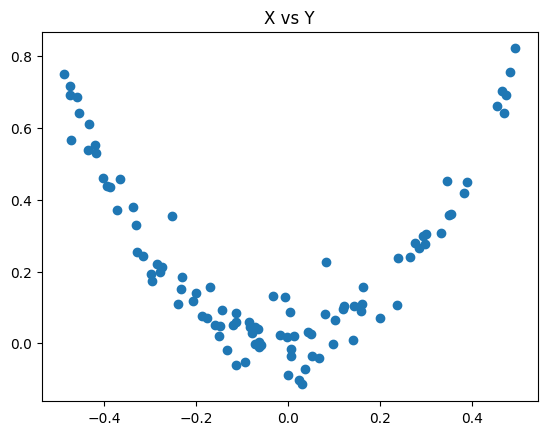

In [61]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [62]:
df['pred1'] = df['y'].mean()

In [63]:
df

,X,y,pred1
0,-0.064005,-0.010810,0.222006
1,-0.474074,0.691782,0.222006
2,0.049662,0.026492,0.222006
3,-0.064678,0.040863,0.222006
4,-0.079632,0.029234,0.222006
...,...,...,...
95,-0.083247,0.046509,0.222006
96,0.143842,0.103544,0.222006
97,0.161481,0.109760,0.222006
98,-0.329523,0.253088,0.222006


In [64]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.064005,-0.010810,0.222006,-0.232816
1,-0.474074,0.691782,0.222006,0.469776
2,0.049662,0.026492,0.222006,-0.195514
3,-0.064678,0.040863,0.222006,-0.181143
4,-0.079632,0.029234,0.222006,-0.192772
...,...,...,...,...
95,-0.083247,0.046509,0.222006,-0.175498
96,0.143842,0.103544,0.222006,-0.118462
97,0.161481,0.109760,0.222006,-0.112246
98,-0.329523,0.253088,0.222006,0.031082


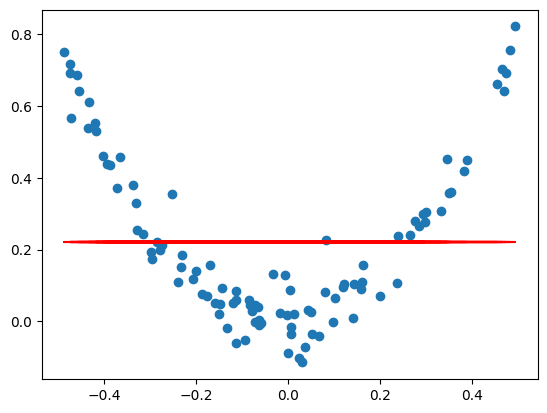

In [65]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [66]:

from sklearn.tree import DecisionTreeRegressor

In [67]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [68]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

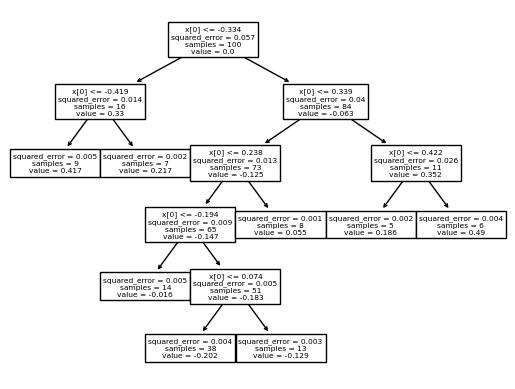

In [69]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [70]:
X_test = np.linspace(-0.5, 0.5, 500)

In [71]:
y_pred = 0.222006 + tree1.predict(X_test.reshape(500, 1))

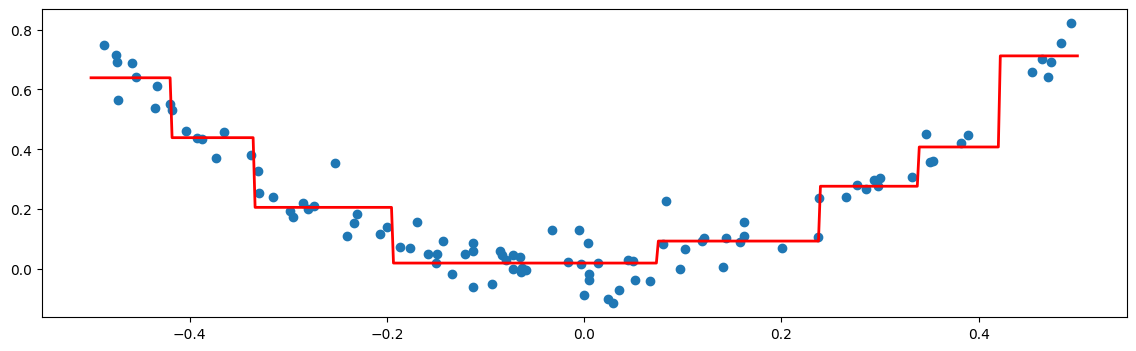

In [72]:
plt.figure(figsize=(14,4))
#plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [73]:
df['pred2'] = 0.222006 + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.064005,-0.010810,0.222006,-0.232816,0.019813
1,-0.474074,0.691782,0.222006,0.469776,0.639127
2,0.049662,0.026492,0.222006,-0.195514,0.019813
3,-0.064678,0.040863,0.222006,-0.181143,0.019813
4,-0.079632,0.029234,0.222006,-0.192772,0.019813
...,...,...,...,...,...
95,-0.083247,0.046509,0.222006,-0.175498,0.019813
96,0.143842,0.103544,0.222006,-0.118462,0.093329
97,0.161481,0.109760,0.222006,-0.112246,0.093329
98,-0.329523,0.253088,0.222006,0.031082,0.205978


In [74]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.064005,-0.010810,0.222006,-0.232816,0.019813,-0.030624
1,-0.474074,0.691782,0.222006,0.469776,0.639127,0.052655
2,0.049662,0.026492,0.222006,-0.195514,0.019813,0.006679
3,-0.064678,0.040863,0.222006,-0.181143,0.019813,0.021050
4,-0.079632,0.029234,0.222006,-0.192772,0.019813,0.009421
...,...,...,...,...,...,...
95,-0.083247,0.046509,0.222006,-0.175498,0.019813,0.026695
96,0.143842,0.103544,0.222006,-0.118462,0.093329,0.010216
97,0.161481,0.109760,0.222006,-0.112246,0.093329,0.016431
98,-0.329523,0.253088,0.222006,0.031082,0.205978,0.047110


In [75]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [76]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [77]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2]) #HAVE TAKEN LEARNING RATE IS 1

Text(0.5, 1.0, 'X vs y')

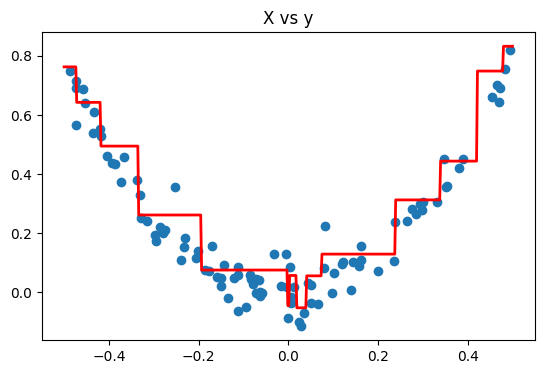

In [78]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [79]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

  #need to properly understand this


8


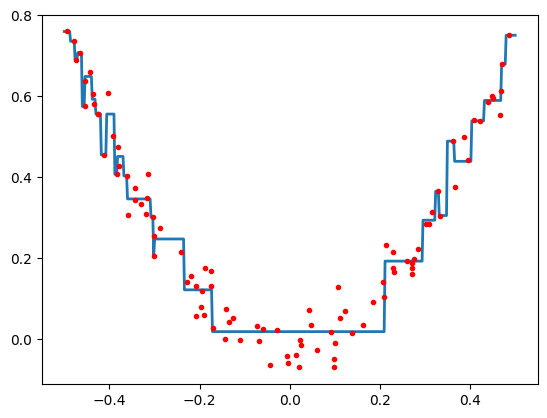

7


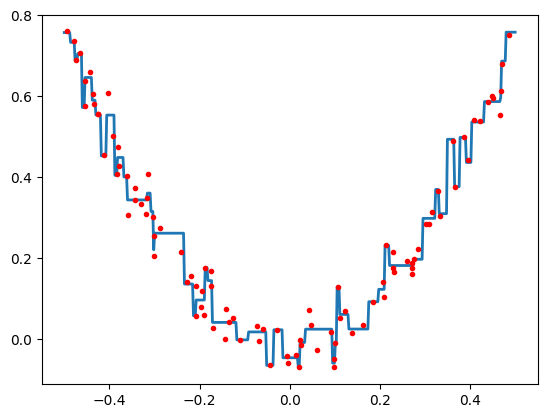

6


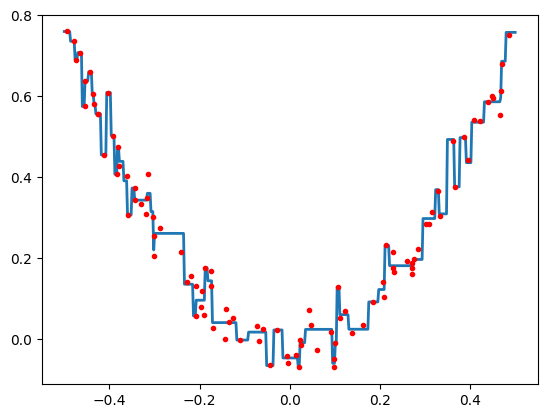

5


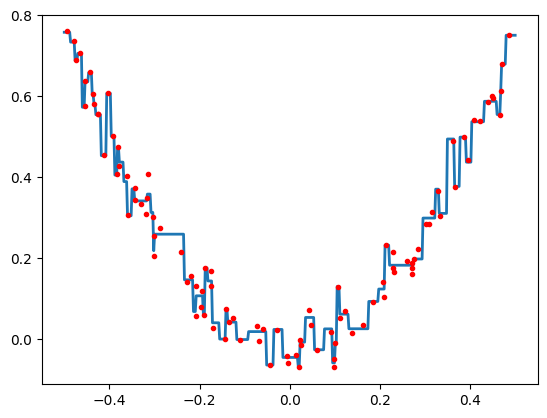

4


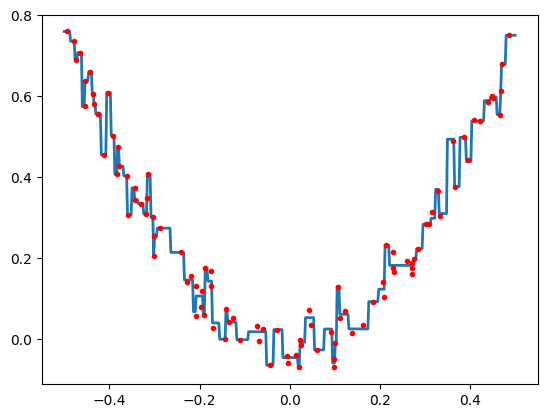

3


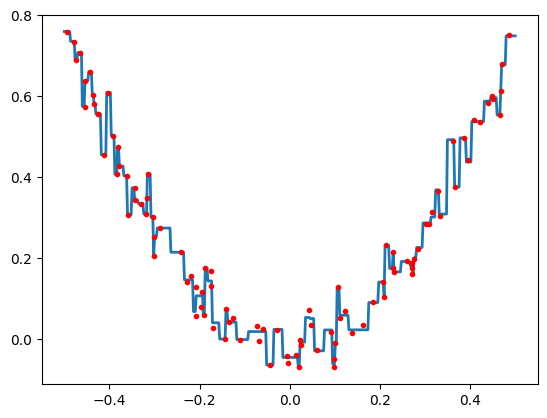

2


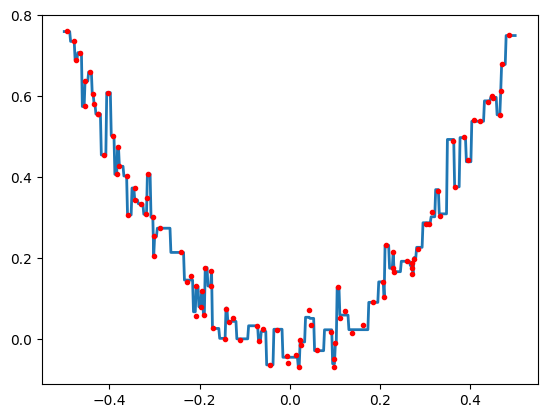

1


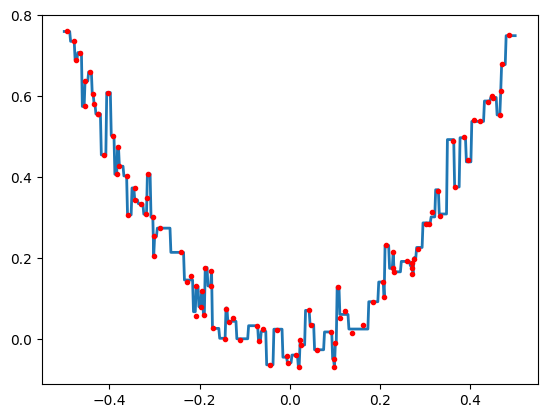

In [80]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,8,lr=1)
